In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

In [2]:
titanic = sns.load_dataset("titanic")

In [40]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
#Analizar los datos y generar 6 insights relevantes

In [4]:
titanic.shape

(891, 15)

In [5]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

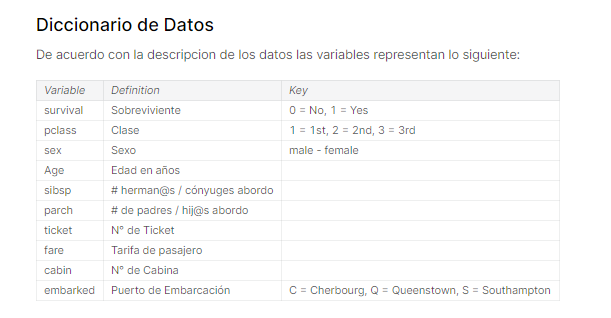

In [6]:
titanic.info

<bound method DataFrame.info of      survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0           0       3    male  22.0  ...   NaN  Southampton     no  False
1           1       1  female  38.0  ...     C    Cherbourg    yes  False
2           1       3  female  26.0  ...   NaN  Southampton    yes   True
3           1       1  female  35.0  ...     C  Southampton    yes  False
4           0       3    male  35.0  ...   NaN  Southampton     no   True
..        ...     ...     ...   ...  ...   ...          ...    ...    ...
886         0       2    male  27.0  ...   NaN  Southampton     no   True
887         1       1  female  19.0  ...     B  Southampton    yes   True
888         0       3  female   NaN  ...   NaN  Southampton     no  False
889         1       1    male  26.0  ...     C    Cherbourg    yes   True
890         0       3    male  32.0  ...   NaN   Queenstown     no   True

[891 rows x 15 columns]>

In [7]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

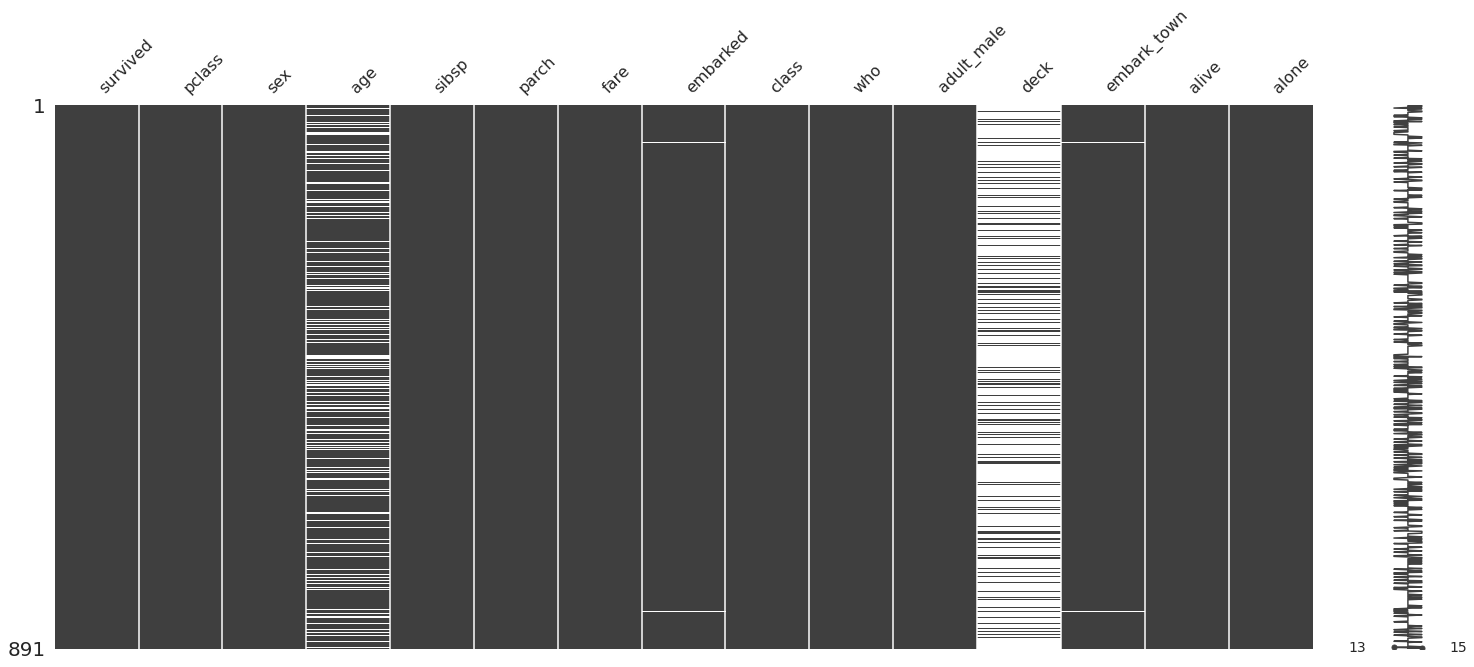

In [8]:
import missingno as msno
msno.matrix(titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<bound method Series.sort_index of 0    549
1    342
Name: survived, dtype: int64>

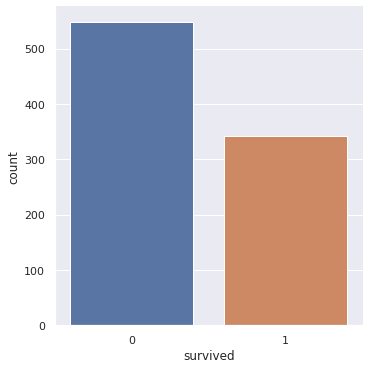

In [36]:
sns.factorplot('survived',data=titanic,kind="count")
titanic['survived'].value_counts().sort_index

Valor 0 = 61.62% = 549

Valor 1 = 38.38% = 342

**Total = 891**

De la data procesada se puede determinar que del 38% que sobrevivió:
- Un 63% fueron los que estaban en 1era. Clase.
- El 74% fueron mujeres.
- El 55% embarcaron en Cherbourg.
- Un 51% no estaban solos.
- El 53% tenia un hermano o cónyuge.
- Un 60% que tenian 3 acompañantes entre padres o hijos abordo.

In [11]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


survived               
          count  sum      mean
pclass                        
1           216  136  0.629630
2           184   87  0.472826
3           491  119  0.242363

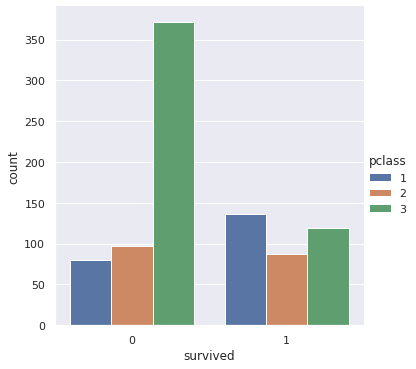

In [33]:
sns.factorplot('survived',data=titanic,hue='pclass',kind="count")
titanic[['pclass', 'survived']].groupby(['pclass'], as_index=False).agg(['count','sum','mean'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


survived               
          count  sum      mean
sex                           
female      314  233  0.742038
male        577  109  0.188908

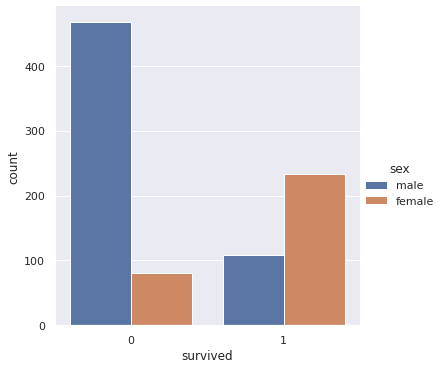

In [43]:
sns.factorplot('survived',data=titanic,hue='sex',kind="count")
titanic[['sex', 'survived']].groupby(['sex'], as_index=False).agg(['count','sum','mean'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


survived               
         count  sum      mean
who                          
child       83   49  0.590361
man        537   88  0.163873
woman      271  205  0.756458

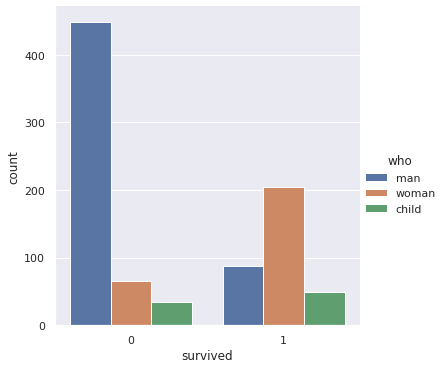

In [44]:
sns.factorplot('survived',data=titanic,hue='who',kind="count")
titanic[['who', 'survived']].groupby(['who'], as_index=False).agg(['count','sum','mean'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


survived               
               count  sum      mean
embark_town                        
Cherbourg        168   93  0.553571
Queenstown        77   30  0.389610
Southampton      644  217  0.336957

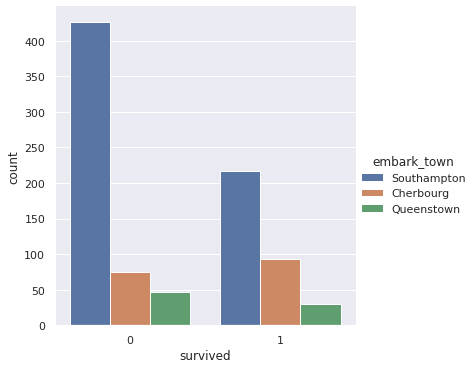

In [38]:
sns.factorplot('survived',data=titanic,hue='embark_town',kind="count")
titanic[['embark_town', 'survived']].groupby(['embark_town'], as_index=False).agg(['count','sum','mean'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


survived               
         count  sum      mean
alone                        
False      354  179  0.505650
True       537  163  0.303538

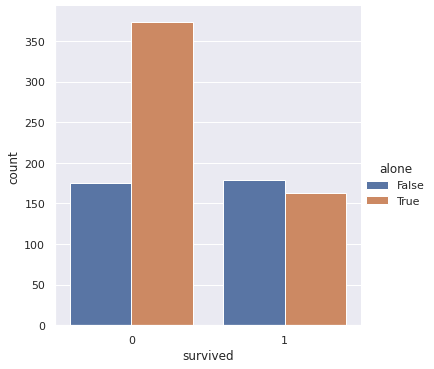

In [42]:
sns.factorplot('survived',data=titanic,hue='alone',kind="count")
titanic[['alone', 'survived']].groupby(['alone'], as_index=False).agg(['count','sum','mean'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


survived               
         count  sum      mean
sibsp                        
0          608  210  0.345395
1          209  112  0.535885
2           28   13  0.464286
3           16    4  0.250000
4           18    3  0.166667
5            5    0  0.000000
8            7    0  0.000000

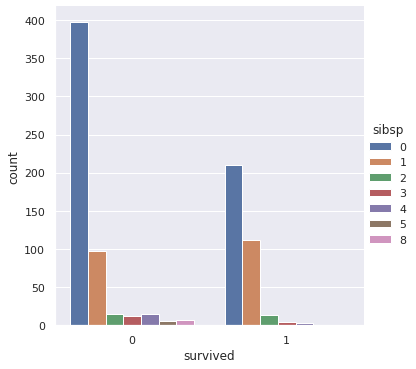

In [45]:
sns.factorplot('survived',data=titanic,hue='sibsp',kind="count")
titanic[['sibsp', 'survived']].groupby(['sibsp'], as_index=False).agg(['count','sum','mean'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


survived               
         count  sum      mean
parch                        
0          678  233  0.343658
1          118   65  0.550847
2           80   40  0.500000
3            5    3  0.600000
4            4    0  0.000000
5            5    1  0.200000
6            1    0  0.000000

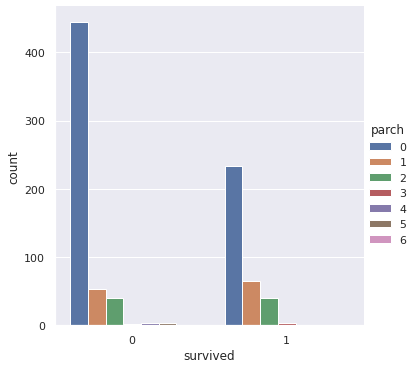

In [46]:
sns.factorplot('survived',data=titanic,hue='parch',kind="count")
titanic[['parch', 'survived']].groupby(['parch'], as_index=False).agg(['count','sum','mean'])

In [30]:
Variables = ['survived','pclass','sibsp', 'parch']

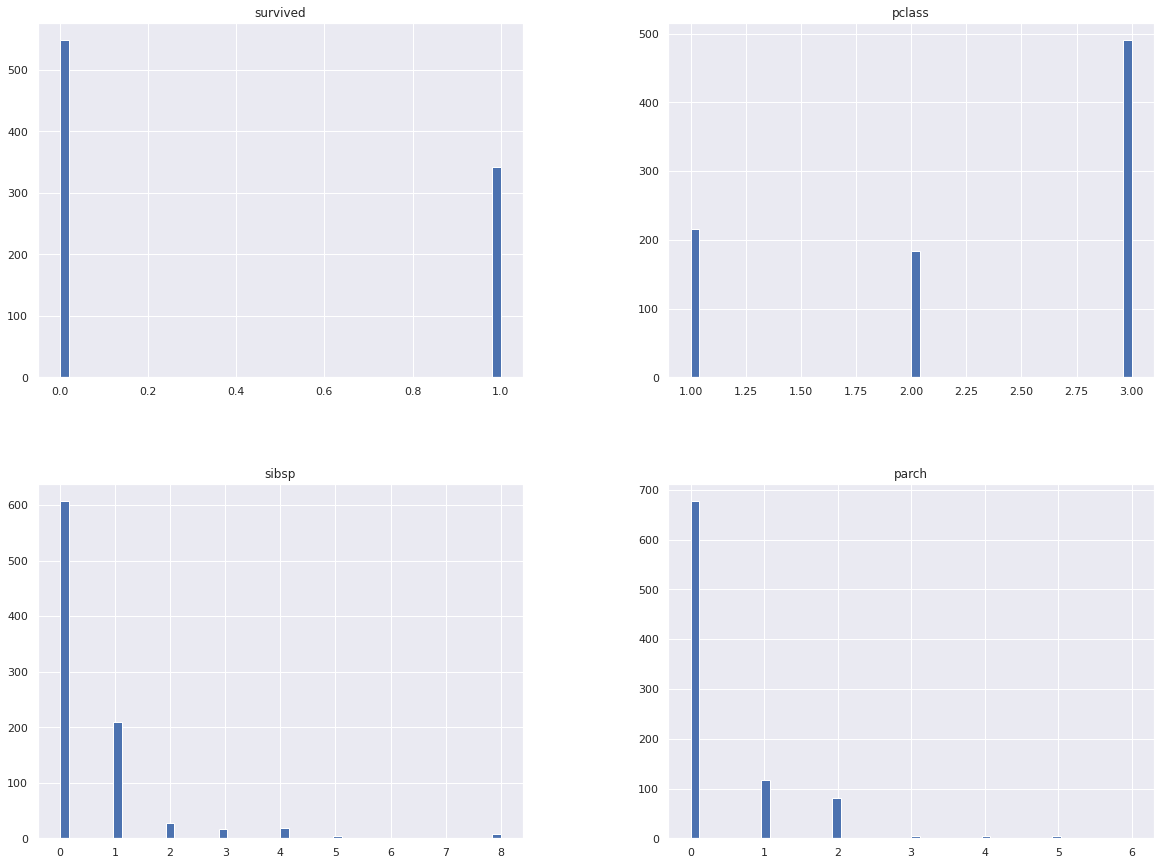

In [31]:
titanic[Variables].hist(bins = 50, figsize=(20,15))
plt.show()

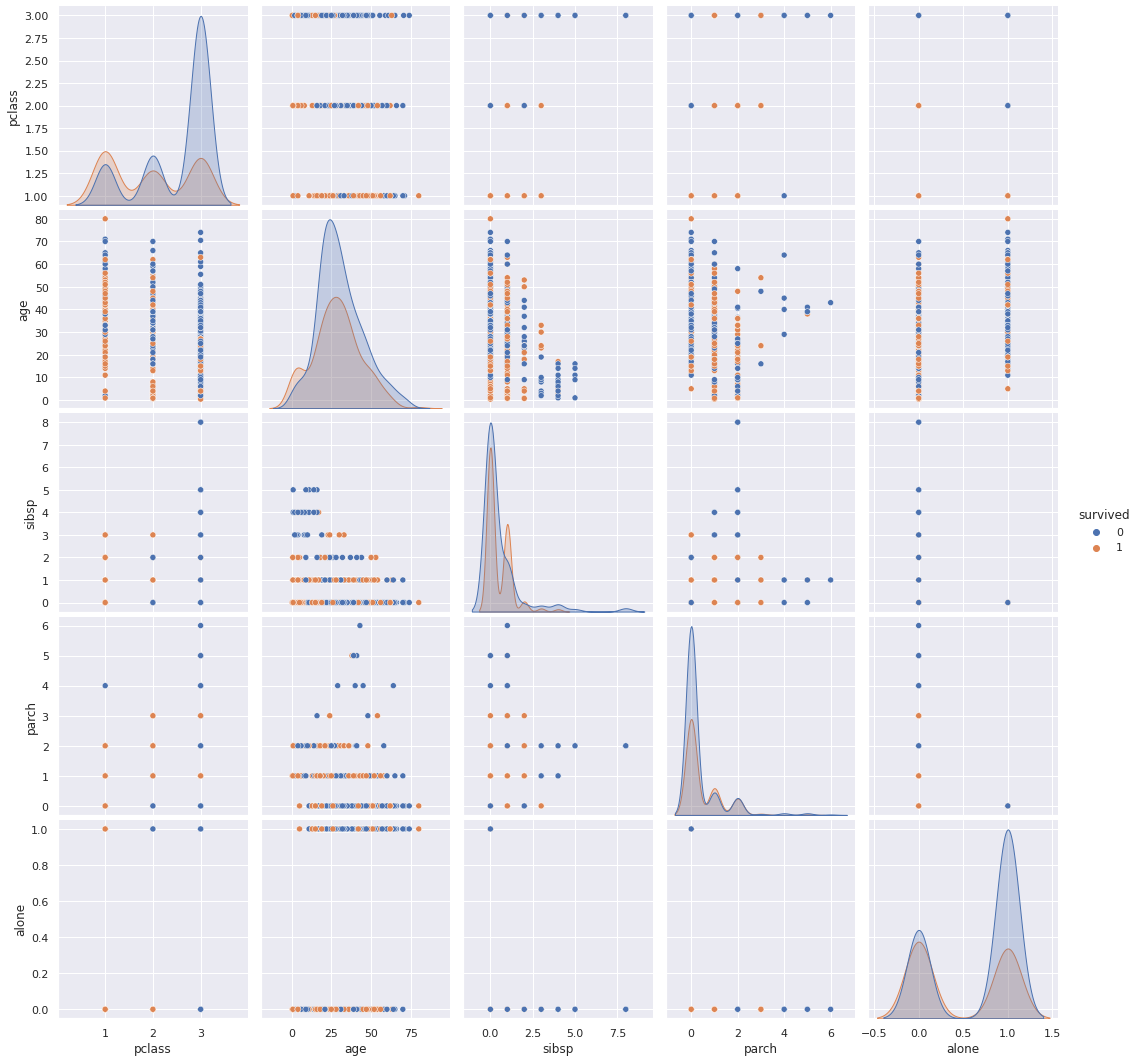

In [41]:
Variables = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',  'embark',
        'alone']
sns.pairplot(titanic[Variables], height=3, diag_kind = 'kde', hue='survived')

Valor 0 = 61.62% = 549

Valor 1 = 38.38% = 342

**Total = 891**

De la data procesada se puede determinar que del 38% que sobrevivió:
- Un 63% fueron los que estaban en 1era. Clase.
- El 74% fueron mujeres.
- El 55% embarcaron en Cherbourg.
- Un 51% no estaban solos.
- El 53% tenia un hermano o cónyuge.
- Un 60% que tenian 3 acompañantes entre padres o hijos abordo.